<a href="https://colab.research.google.com/github/DanielCalimayor/DS-Unit-2-Regression-1/blob/master/Daniel_calimayor_DS_Sprint_Challenge_6_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_
 
# Regression 1 Sprint Challenge

Your Sprint Challenge has two parts.

To demonstrate mastery on each part, do all the required, numbered instructions. 

To earn a score of "3" for the part, also do the stretch goals.

## Part 1. Predict avocado sales 🥑

For part 1 of your challenge, you'll use historical data on avocado sales across the nation!

Run this code cell to load the dataset. It has weekly sales volume (total number of avocados sold) from January 4, 2015 through March 25, 2018. The data comes directly from retailers' cash registers based on actual retail sales of Hass avocados in multiple US markets.

In [0]:
import pandas as pd
avocado_url = 'https://drive.google.com/uc?export=download&id=1ljE-LhCA9CCFvSIJYJ1ewX8JmdDpfuhi'
avocado = pd.read_csv(avocado_url)
assert avocado.shape == (169, 2)

### Required

#### Use the Prophet library to:
1. Fit a model and forecast avocado sales through March 25, 2020
2. Plot the forecast
3. Plot the forecast components
4. Do time series cross-validation, with these parameters: `horizon='90 days', period='45 days', initial='730 days'`
5. Plot the cross-validation Mean Absolute Percentage Error: `metric='mape'`

_For Part 1 of this Sprint Challenge, you are **not** required to calculate or plot baselines, or do train/test split._

You can be confident you've done it correctly when your plots look similar to these:

<img src="https://i.imgur.com/PoyVGp7.png" width="400" align="left">



### Stretch Goal
- Adjust your forecasts with Prophet's options for changepoints, holidays, and fourier order. Improve the cross-validation MAPE.

In [0]:
%matplotlib inline
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
avocado.head()

,Date,Total Volume
0,2015-01-04,84674288
1,2015-01-11,78555753
2,2015-01-18,78388735
3,2015-01-25,76466226
4,2015-02-01,119453181


In [0]:
avocado.shape

(169, 2)

In [0]:
avocado.dtypes

Date            object
Total Volume     int64
dtype: object

Model Fit

In [0]:
avocado['Date'] = pd.to_datetime(avocado['Date'])
avocado = avocado.set_index('Date')

In [0]:
avocado = avocado.reset_index().rename(columns = {'Date': 'ds', 'Total Volume': 'y'})

In [0]:
avocado.tail()

,ds,y
164,2018-02-25,109231389
165,2018-03-04,111844876
166,2018-03-11,111465145
167,2018-03-18,113673928
168,2018-03-25,118268903


In [0]:
avocado = avocado.rename(columns = {'index': 'ds', 'Total Volume': 'y'})

In [0]:
avocado.head()

,ds,y
0,2015-01-04,84674288
1,2015-01-11,78555753
2,2015-01-18,78388735
3,2015-01-25,76466226
4,2015-02-01,119453181


In [0]:
m = Prophet()
m.fit(avocado)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods = 731)
forecast = m.predict(future)

Forecast plot

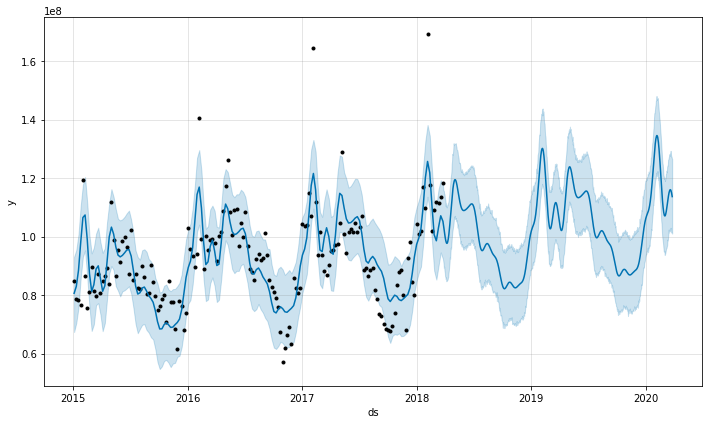

In [0]:
fig = m.plot(forecast)

Forecast components

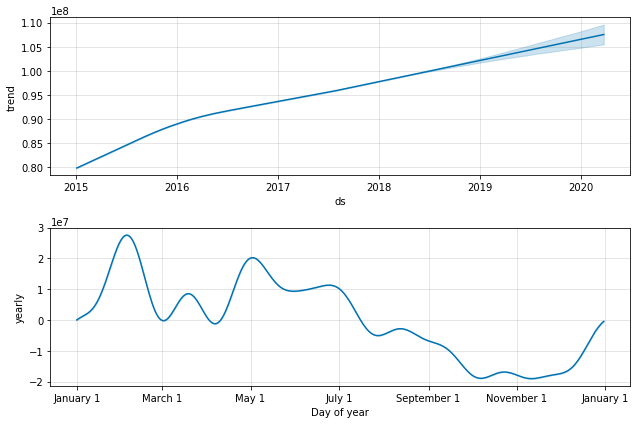

In [0]:
fig1 = m.plot_components(forecast)

Time Series Cross-Validation

In [0]:
%%time
avocado_model = Prophet(daily_seasonality=False)
avocado_model.fit(avocado)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


CPU times: user 86.7 ms, sys: 5.75 ms, total: 92.5 ms
Wall time: 92.3 ms


In [0]:
avocado_cv = cross_validation(avocado_model, initial='730 days',horizon='90 days', period='45 days')

INFO:fbprophet:Making 8 forecasts with cutoffs between 2017-02-13 00:00:00 and 2017-12-25 00:00:00


In [0]:
avocado_cv.shape

(103, 6)

In [0]:
avocado_cv.describe(exclude = 'number')

,ds,cutoff
count,103,103
unique,58,8
top,2017-09-17 00:00:00,2017-03-30 00:00:00
freq,2,13
first,2017-02-19 00:00:00,2017-02-13 00:00:00
last,2018-03-25 00:00:00,2017-12-25 00:00:00


cross-validation Mean Absolute Percentage Error plot

In [0]:
performance_metrics(avocado_cv).tail()

,horizon,mse,rmse,mae,mape,coverage
77,86 days,4.382687e+14,2.093487e+07,1.481539e+07,0.136019,0.6
78,87 days,4.353030e+14,2.086392e+07,1.464509e+07,0.132272,0.6
79,88 days,4.621349e+14,2.149732e+07,1.608344e+07,0.154498,0.5
80,89 days,4.604971e+14,2.145920e+07,1.585167e+07,0.152976,0.5
81,90 days,4.878952e+14,2.208835e+07,1.674935e+07,0.148295,0.4


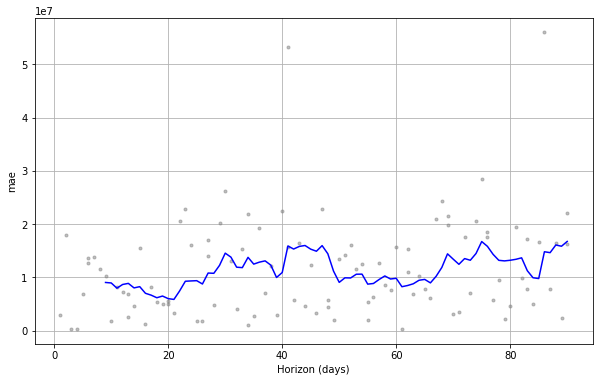

In [0]:
from fbprophet.plot import plot_cross_validation_metric
fig2 = plot_cross_validation_metric(avocado_cv, metric = 'mae')

## Part 2. Predict NYC apartment rent 🏠💸

For part 1 of your challenge, you'll use a real-world data with rent prices for a subset of apartments in New York City!

Run this code cell to load the dataset: 

In [0]:
import pandas as pd
rent_url = 'https://drive.google.com/uc?export=download&id=1lVVPmh-WYGb_0Gs_lOv22i02-150qDdZ'
rent = pd.read_csv(rent_url)
assert rent.shape == (48295, 7)

### Required
1. Begin with baselines for regression. Calculate the mean absolute error and $R^2$ score for a mean baseline. _(You can use the whole dataset, or a test set, either way is okay here!)_
2. Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
3. Choose any two features.
4. Use scikit-learn to fit a Linear Regression model on the train data.
5. Apply the model to predict rent prices for the test data.
6. Get regression metrics MAE and $R^2$ for the test data.
7. Get the model's coefficients and intercept.

### Stretch Goals
- Try at least 3 different feature combinations. (You don't have to use two features, you can choose any number of features.)
- Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.

In [0]:
rent.head()

,year,month,bedrooms,bathrooms,latitude,longitude,price
0,2016,6,3,1.5,40.7145,-73.9425,3000
1,2016,6,2,1.0,40.7947,-73.9667,5465
2,2016,4,1,1.0,40.7388,-74.0018,2850
3,2016,4,1,1.0,40.7539,-73.9677,3275
4,2016,4,4,1.0,40.8241,-73.9493,3350


In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

features = ['bedrooms']
target = 'price'
x = rent[features]
y = rent[target]

m = 0
b = y.mean()
y_pred = m*x + b

model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Mean Absolute Error: 3420.0352003312973
R^2: -5.957510473313843


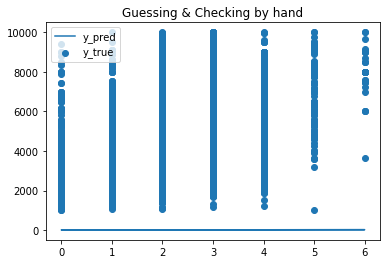

In [0]:
m = 2
b = 15
y_pred = m*x + b
plot_preds(x, y, y_pred)
plt.title('Guessing & Checking by hand');

Mean Absolute Error: 1055.7857771080928
R^2: 0.0


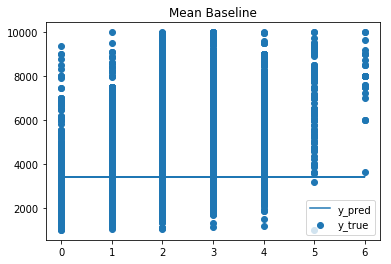

In [0]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def plot_preds(x, y, y_pred):
    plt.scatter(x, y, label='y_true')
    plt.plot(x, y_pred, label='y_pred')
    plt.legend()
    
    
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('Mean Absolute Error:', mae)
    print('R^2:', r2)
    
    
    
plot_preds(x, y, y_pred)
plt.title('Mean Baseline');

In [0]:
model.intercept_, model.coef_, 

(2355.5001501970596, array([717.67413755]))

In [0]:
model.predict([[0]])

array([2355.5001502])

Mean Absolute Error: 851.3788059210636
R^2: 0.3124520482040829


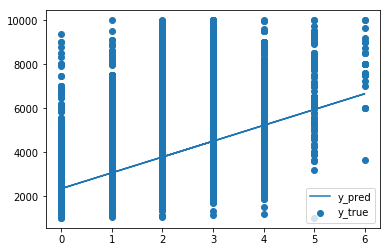

In [0]:
m = model.coef_[0]
b = model.intercept_

y_pred = m*x + b
plot_preds(x, y, y_pred)

In [0]:
rent['month'] = pd.to_datetime(rent['month'], format='%m')

In [0]:
train = rent.query['month 04 <']
test = rent.query['month = 6']

TypeError: ignored

In [0]:
x = train
y = test

((0, 1), (0,), (0, 1), (0,))

,year,month,bedrooms,bathrooms,latitude,longitude,price
